# Random Forest classifer  - Micasense rededge camera

In [ ]:
"""This code is used to develop classification of the Micasense redege camera over the 
mangrove communities across Darwin harbour using sklearns random forest classifer. The final candidate model is 
serialised using cpickle""" 

Populating the interactive namespace from numpy and matplotlib
[ 6  5  8  7  1  3 12  2 10  4 11  9]
this is the size of the training data  (5644, 5) (5644,)
this is the size of the testing data  (6, 5) (6,)


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sample']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


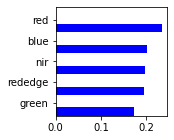

Overall accuracy of the classifier = 0.6666666666666666


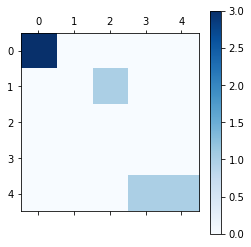

In [5]:
from sklearn.ensemble import RandomForestClassifier
from numpy import genfromtxt, savetxt
import pandas as pd
%pylab inline
import numpy as np
from random import sample
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import pickle
from sklearn.metrics import confusion_matrix
pd.options.mode.chained_assignment = None  # default='warn'
pylab.rcParams['figure.figsize'] = (2, 2)

def main():
    
    # if you change the name of the clean training data csv file you need to change it in the next line or nothing will happen!   
    df = pd.read_csv('combined_training_rededge.csv', header=0)
    #df = df[(df['class'] != 2)]
    print(df['class'].unique())
    #print (list(df))
    train = df[['class', 'blue', 'green','red','nir','rededge']] 
               
    #print (train)
    #print (train['class'].unique())
    class_names = train['class'].unique()
    
    # select out the predictor variables    
    tr = train[['blue', 'green','red','nir','rededge']]
    # convert them to a numpy array
    #tr1 = tr.as_matrix(columns=[tr.columns[0:]])
    #print (tr)
    # select out landsystem classes
    target1 = train[['class']]
    tar = target1.values
    target = tar.ravel()
    
    # cross validation data randomly selected
    
    X_train, X_test, y_train, y_test = train_test_split(tr, target, test_size=0.001, random_state=0)
    print ('this is the size of the training data ', X_train.shape, y_train.shape)
    print  ('this is the size of the testing data ',X_test.shape, y_test.shape)
    #print tr1.shape
    
    
    #create and train the random forest
    #multi-core CPUs can use: rf = RandomForestClassifier(n_estimators=100, n_jobs=2)
    rf = RandomForestClassifier(n_estimators=512,max_features='log2', n_jobs=-1)
    rfc = rf.fit(X_train, y_train)
    results = rfc.predict(X_test)
    #print (results)
    #print (y_2)
    
    
    # feature importance calculations
    feature_importance = rf.feature_importances_
    fi = enumerate(rf.feature_importances_)
    
    cols = tr.columns 
    fiResult = [(value,cols[i]) for (i,value) in fi]
    #print (fiResult)
    fiResult = np.array(fiResult)
    score = float64(fiResult[:,0])
    band = fiResult[:,1]
    a = fiResult[np.argsort(fiResult[:, 1])]


    df = pd.DataFrame(dict(band=band,n=score))
    #df.convert_objects(convert_numeric=True).dtypes
    #ind = np.arange(len(df))
    dfsort = df.sort_values(['n'], ascending=[False])
    #print dfsort

    # my complicated way to get the bar plot to sort in ascending order and display the assocated band names in the y axis 

    dfsort2 = df.sort_values(['n'], ascending=[True])
    b = dfsort2[['band']]
    c = b.values.tolist()
    # convert the list of band names in the correct order to a string
    e = str(c)
    # strips all the rubbish from the string 
    f = e.replace('[','').replace(']','').replace("'",'').replace(",",' ')
    # convert the cleaned up string back into a list to plot the band names in the bar graph
    g = f.split()

    ind = np.arange(len(df))
    width = 0.4

    fig, ax = plt.subplots()
    ax.barh(ind, dfsort2.n, width, color='blue')
    ax.set(yticks=ind + width, yticklabels= g, ylim=[2*width - 1, len(df)])
    plt.show()
    fig.savefig('Band_importance_score_re_Class.pdf',dpi=100)
 
    
    r2 = rf.score(X_test, y_test, sample_weight=None)
    print ('Overall accuracy of the classifier =',r2)
    y_test_predict = rf.predict(X_test)
    #plt.scatter(y_test_predict, y_test)
    cmap=plt.cm.Blues
    m = confusion_matrix(y_test, y_test_predict)
    plt.matshow(m, cmap=cmap)
    plt.colorbar()
    
    #out_results = [results, y_2]
    df_p = pd.DataFrame(results)
    df_o = pd.DataFrame(y_test)
    df_r = pd.concat([df_p, df_o], axis=1)
    #print (df_r)
    df_r.to_csv('test_results.csv')
    
    """uncomment the code below and change the cpickle file name to save out the random forest classifer"""
    
    
    # save out model to a cPickle file 
    with open('rfc_cpickle_re_20220426.p', 'wb') as f:
        pickle.dump(rfc, f,protocol=2)

if __name__=="__main__":
    main()

In [7]:
ls

 Volume in drive E is Data_01
 Volume Serial Number is 72D1-0BED

 Directory of E:\DENR\code\uav_classifiers\re

04/26/2022  10:12 AM    <DIR>          .
04/26/2022  10:12 AM    <DIR>          ..
04/26/2022  09:27 AM    <DIR>          .ipynb_checkpoints
08/13/2019  05:33 AM             3,840 apply_re_classifier_multi.py
04/26/2022  09:28 AM             7,120 Band_importance_score_re_Class.pdf
08/24/2019  10:52 AM             4,652 clip_raster.ipynb
07/23/2019  05:27 PM           429,135 combined_training_rededge.csv
07/29/2019  11:26 AM       148,251,934 combined_training_rededge_Result.p
04/26/2022  09:09 AM             3,275 PP_C_RedEdge_Model_V2.py
04/26/2022  09:12 AM            17,339 RandomForestClassifer_Micasense_rededge_development.ipynb
04/26/2022  09:29 AM            16,975 RandomForestClassifer_Micasense_rededge_development_temp_for_testing.ipynb
04/26/2022  08:34 AM             4,871 re_training_data_prep.ipynb
04/26/2022  09:06 AM       163,601,196 rfc_cpickle_re_20220426